In [1]:
import pandas as pd
import collections

with open('../Data/data_v2.json', 'r', encoding="utf-8_sig") as json_file:
    data = pd.read_json(json_file)
#with open('../Data/data_v3_del_argandpred_for_span.json', 'r',encoding='utf-8_sig') as json_file:
#    data = pd.read_json(json_file, orient='records', lines=True)
# （データのトークン数，predのトークン数，ラベル数） の平均，マックス，ミニマムのテーブル．また，データ数 を算出
data['sent_token'] = data['sentence'].map(lambda x: len(x.split(' ')))
data['pred_token'] = data['predicate'].map(lambda x: len(x['surface'].split(' ')))
data['labels_per_a_pred'] = data['args'].map(lambda x: len(x))
data['arg_len'] = data['args'].map(lambda x: max(len(arg['surface'].split(' ')) for arg in x))

data_list = [[data['sent_token'].max(), data['sent_token'].min(), data['sent_token'].mean()]]
data_list.append([data['pred_token'].max(), data['pred_token'].min(), data['pred_token'].mean()])
data_list.append([data['labels_per_a_pred'].max(), data['labels_per_a_pred'].min(), data['labels_per_a_pred'].mean()])

df = pd.DataFrame(data_list, index=['sent_token','pred_token','labels_per_a_pred'], columns=['max', 'min', 'mean'])

arg_list=[]
for args in data['args']:
    for arg in args: 
        arg_list.append(arg['argrole'])
s= set(arg_list)
print(len(s))
c = collections.Counter(arg_list)
c = sorted(list(c.items()), key=lambda x:x[1], reverse=True)

arg_list=[]
for args in data['args']:
    for arg in args: 
        arg_list.append(len(arg['surface'].split(' ')))
print('Ave of arg length', round( sum(arg_list)/len(arg_list), 3) )
print('max and min of arg length', max(arg_list), min(arg_list))
print('Num of data = ', len(data))
print('Num of data (arg <= 30) = ',len(data[data['arg_len'] <= 30]))
print(df.round(2))
print('max arg len = ', max(data['arg_len']))
print('max fid = ', max(data['predicate'].map(lambda x:x['frameID'])))
print('max fid = ', min(data['predicate'].map(lambda x:x['frameID'])))

31
Ave of arg length 3.845
max and min of arg length 114 1
Num of data =  54141
Num of data (arg <= 30) =  53827
                   max  min   mean
sent_token         252    2  24.05
pred_token          10    1   1.49
labels_per_a_pred    7    1   1.73
max arg len =  114
max fid =  1097
max fid =  1


In [48]:
import numpy as np
with open('../Data/data_v2.json', 'r', encoding="utf-8_sig") as json_file:
    data = pd.read_json(json_file)

def comp_arg_pred(args, pred):
    for arg in args:
        if arg['word_end'] > pred['word_start']:
            return np.nan
        #print(arg['word_end'], pred['word_end'])
    return True

print(len(data))
data['comp'] = data.apply(lambda x:comp_arg_pred(x[4], x[3]), axis=1) # xは各行．x[1]はsentencve, x[3]はpredicate
len(data.dropna(subset=['comp']))

54141


42982

In [13]:
from sklearn.model_selection import train_test_split
train_df, test_valid_df = train_test_split(data, test_size=0.2, random_state=0)
test_df, valid_df = train_test_split(test_valid_df, test_size=0.5, random_state=0)
len(train_df)
len(train_df.duplicated(subset=['sentence']))

43093

In [34]:
import numpy as np
print(np.percentile(data['sent_token'].to_list(), 90))
# 49単語で90%の文を網羅．網羅できない者に関しても，predicateのstartが文章に含まれているなら学習には用いるという方針
# Max_token = 49 + 6 = 55

53.0


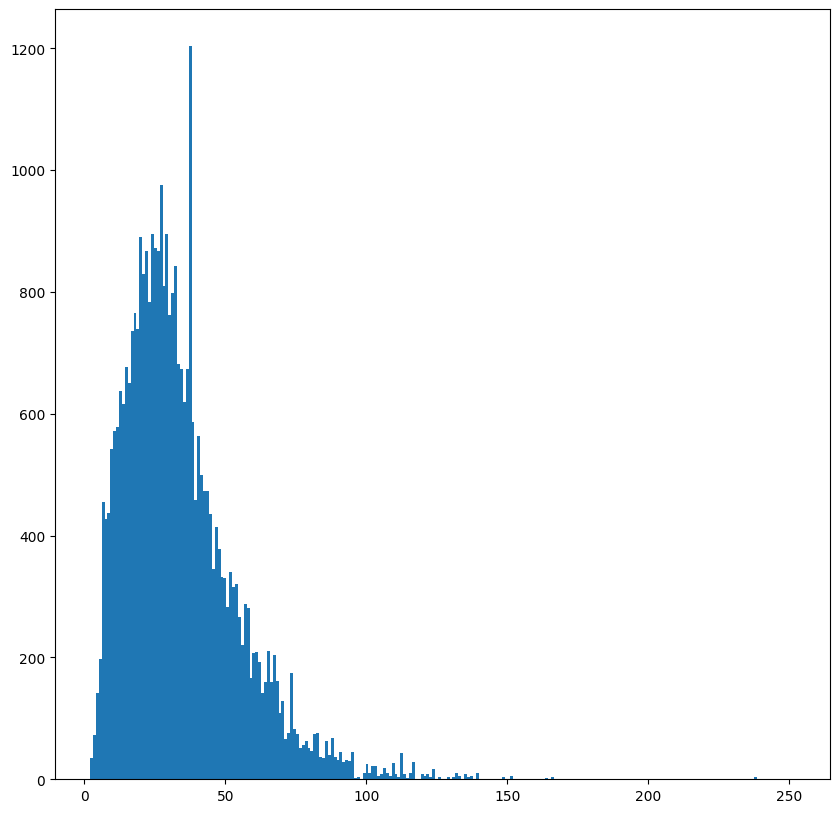

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
fig = plt.hist(data['sent_token'], bins=243)
plt.show()

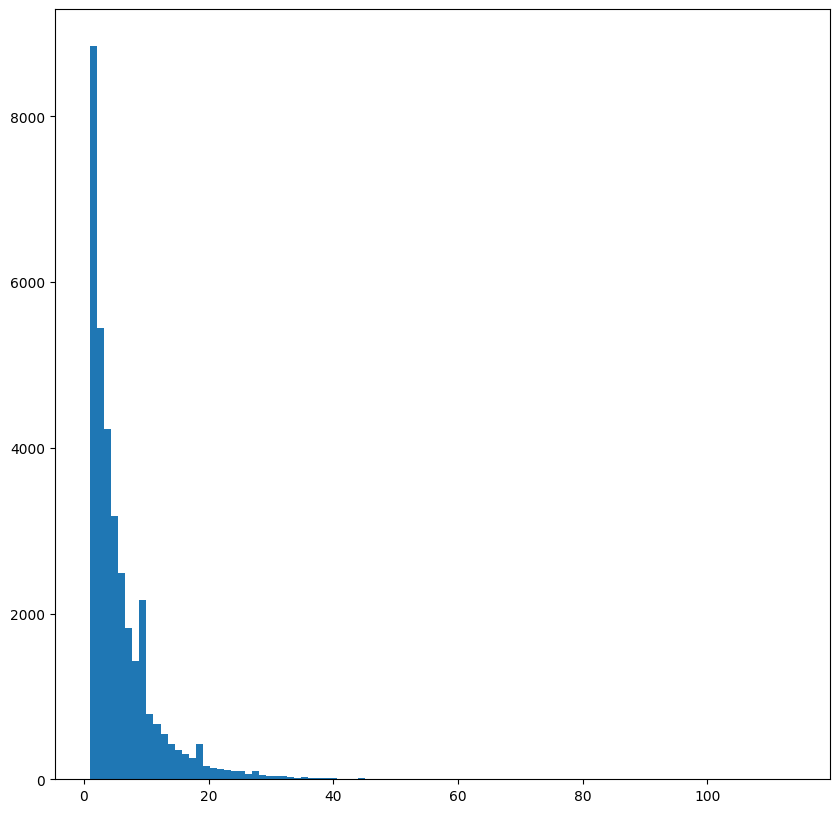

In [10]:
with open('../Data/data_v4.json', 'r', encoding="utf-8_sig") as json_file:
    data = pd.read_json(json_file)
data['arg_len'] = data['args'].map(lambda x: max(len(arg['surface'].split(' ')) for arg in x))

import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
fig = plt.hist(data['arg_len'], bins=100)
plt.show()

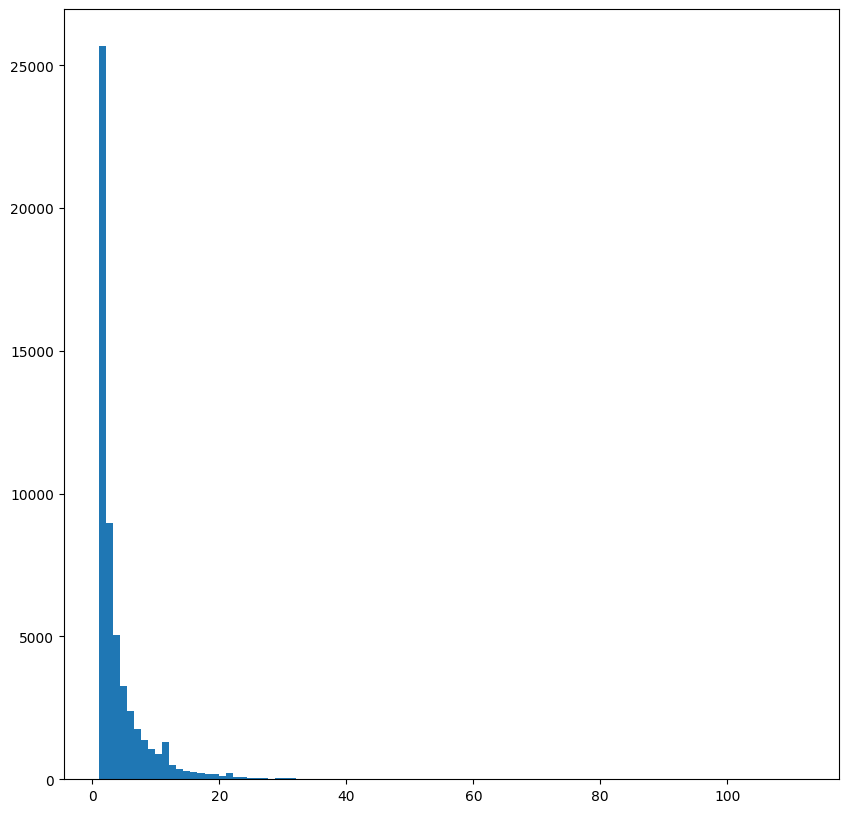

In [11]:
with open('../Data/data_v3.json', 'r', encoding="utf-8_sig") as json_file:
    data = pd.read_json(json_file)
data['arg_len'] = data['args'].map(lambda x: max(len(arg['surface'].split(' ')) for arg in x))

import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
fig = plt.hist(data['arg_len'], bins=100)
plt.show()

# 係り受け